# Contexto ✒️

Notebook destinado ao estudo de redes neurais com a biblioteca PyTorch. Ele irá se debruçar sobre alguns conceitos importantes sobre o tema, mas também sobre a sua implementação, visando fixar a elaboração da arquitetura e o seu passo a passo.

## Bibliotecas 📚

In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn
from torchsummary import summary

from sklearn.datasets import make_moons


## Estudo de caso

Para visualizar o funcionamento da rede irei utilizar um gráfico que cria duas classes não linearmente separáveis.

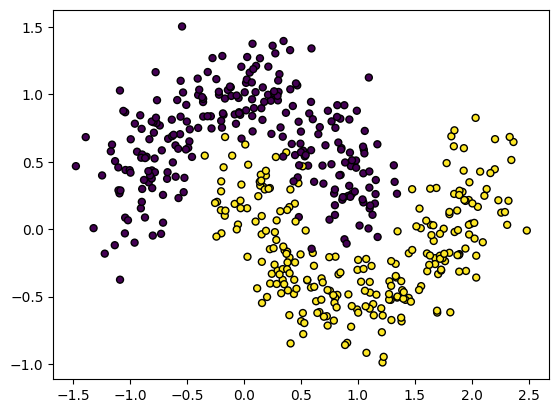

In [7]:
x, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plt.scatter(x[:, 0], x[:, 1],marker = 'o',
            s = 25, edgecolor = 'k', c=y)

plt.show()

## O que são tensores ❓

Uma determinada estrutura de dados, sendo uma generalização dos arrays, com mais de duas dimensões, ou seja, uma matriz que apresenta 3 dimensões é tida como tensor, enquanto que uma de 2 dimensões não, sendo considerada um array.

Porém, no contexto dos frameworks de machine learning associados ao deep learning construído mediante a implementação de estrutura de dados do tipo tensor, convencionou-se chamar de tensor todo e qualquer vetor ou matriz sem considerar a sua dimensão própria.

Nesse sentido, existirá tensores de 0 dimensão, para representar valores escalares, de 1 dimensão para vetor, de 2 dimensão para matrizes e assim por diante.

Para lembrar : array se refere a uma lista de matrizes, construída segundo a forma abaixo.

``[[a, b, c, d]]``




## Arquitetura da rede 🕍

A rede neural é construída segundo três camadas principais e que se referem à sua função, que são : camada de entrada, de processamento (hidden layer) e a camda de saída.

Cada camada apresenta uma função para a elaboração da rede, na forma que a primeira é responsável pela entrada dos dados à rede, enviando-os para as camadas posteriores, como a camada de processamento, que é responsável pela realização do aprendizado propriamente dito, uma vez que por meio das funções de ativações a ela empregadas, torna a rede capaz de aprender padrões complexos (não lineares).

A camada de saída se relaciona à saída final do que a rede encontrou, podendo ser valores decimais para probabilidade, num contexto de classificação, ou um único valor contínuo em cenários de regressão.

Nesse sentido, esquematicamente a rede pode ser vista como :     

- camada de entrada
- camada de processamento (hidden layer)
- camada de saída

### Mas como implementar a arquitetura ?

A implementação da arquitetura ocorre juntamente com a aplicação do Sequential, um objeto da classe torch, responsável por criar um container responsável pela execução de cada camada  sequencialmente, semelhante ao proceder do objeto pipeline. Vejamos.

In [3]:
# Para um cenário que pretende-se realizar
# uma classificação binária de uma categoria ou outra.

input_size = 2
hidden_size = 8 # Seu valor de escolha é um hiperparâmetro sujeito a escolha do desenvolvedor.
output_size = 1

net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),
                    nn.ReLU(),
                    nn.Linear(in_features=hidden_size, out_features=1))

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [4]:
# Para visualizar a quantidade de parâmetros da rede e o espaço de memória ocupado :

summary(net, input_size=(1,input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Analisando o sumário, compreende-se que o conjunto total de parâmetros existentes na rede criada é de 33. A primeira camada apresenta 24 parâmetros, que se referem as duas entradas multiplicadas pela quantidade de neurônios presentes na camada escondida, mais o viés que é equivalente à quantidade desses. Ou seja :     

param = (2*8) + 8 = 24

O parâmetro seguinte, com 9 valores indica a quantidade dos neurônios da camada escondida, mais a camada de saída.

### Forward

Etapa na qual os dados entram na rede e são processados até a camada de saída.

In [8]:
x.dtype

dtype('float64')

In [9]:
tensor = torch.from_numpy(x).type(torch.float32)

In [10]:
pred = net(tensor)

In [14]:
print(f'Formato de entrada : {tensor.shape}')
print(f'Formato de saída : {pred.shape}')


Formato de entrada : torch.Size([500, 2])
Formato de saída : torch.Size([500, 1])


## Implementando a arquitetura da rede com a classe nn.Module

Por mais que conseguimos criar a arquitetura de uma rede utilizando simplesmente o método Sequential, similarmente como é possível de fazer utilizando o Keras para a criação das redes, utilizar de uma estrutura em classe pode ser mais útil para o controle de aplicações mais complexas. Nesse sentido, vejamos como se dá a sua criação.

In [18]:
# Para a criação da rede, crio minha classe que se estende
# da classe principal nn.Module, que prove a capacidade de
# criação das redes neurais.

# A classe criada apresenta dois escopos principais, que é
# relativa à arquitetura da rede modelada, bem como a etapa
# de forward dos dados.

# Na etapa da arquitertura, antes de modelas a rede, deve-se
# inicializar a classe estendida, a qual estamos herdando, por
# meio do método super, como é demonstrado abaixo.

class my_net(nn.Module):

  # Definie a arquitetura :

  def __init__(self, input_size, hidden_size, output_size):
    super(my_net, self).__init__()

    # Arquitetura da rede.
    self.hidden = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.activation = nn.ReLU()
    self.output = nn.Linear(in_features=hidden_size, out_features=output_size)

  # Gera o forward da rede a partir da entrada (x) :

  def forward(self, x):

    # Forward :
     hidden = self.activation(self.hidden(x))
     output = self.output(hidden)

     return output

## Instanciando a rede com nn.Module

In [19]:
net = my_net(input_size, hidden_size, output_size)
net

my_net(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (activation): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [20]:
# Para realizar o Forward :

# Objeto net criado pela minha subclasse, recebe como entrada um tensor.

pred = net(tensor)

# Visualizando o formato de saída da rede.
pred.shape

torch.Size([500, 1])

## Verificando o uso de GPU ou CPU.

Essa etapa se refere à verificação do uso da GPU ou CPU para a utilização das redes neurais. Por vezes, dado a exigência dos custos de processamento da rede é recomendado o uso de GPU's ao invés de CPU's.

In [21]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [22]:
device

device(type='cpu')